In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math

In [2]:
img = cv2.imread('test2.png')

In [3]:
origin = cv2.imread('img2.jpg')

In [4]:
M, N, C = img.shape
origin = cv2.resize(origin, (N, M))

In [5]:
img = np.rot90(img)
origin = np.rot90(origin)

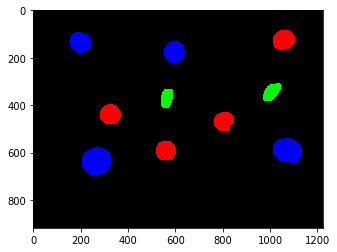

In [6]:
plt.imshow(img)

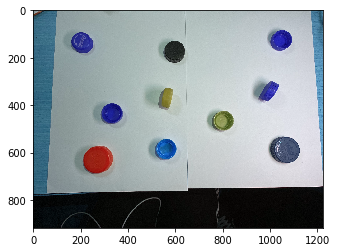

In [7]:
plt.imshow(origin)

In [8]:
def img_label(origin, result):
    # origin: 原图
    # result: unet输出 + 处理后的结果
    # 两者shape应该相等
    
    dst = origin.copy()
    
    gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
    _, _, stats, centroid = cv2.connectedComponentsWithStats(gray, connectivity=8) # 提取连通分量的边框和中心值
    
    # 去除背景
    stats = stats[1:, ...]
    centroid = centroid[1:, ...].astype(np.int32)
    
    # 给原图中的瓶盖染色
    indices = np.sum((result != (0, 0, 0)), axis=-1, dtype=np.bool)
    dst[indices, :] = result[indices, :]
    
    for i in range(len(stats)):
        cx, cy = centroid[i]
        x, y, w, h, _ = stats[i]
        black = (0, 0, 0)
        string = '({}, {})'.format(cx, cy)
        
        if result[cy, cx, 1] == 255: # 侧着
            idx = np.where(result[y:y+h, x:x+w, 1] == 255) # 连通分量
            
            # 根据矩形长宽比确定拟合的自变量
            if w > h:
                p = np.polyfit(idx[1], idx[0], 1)
                angle = int(math.atan2(1, p[0]) / math.pi * 180)
            else:
                p = np.polyfit(idx[0], idx[1], 1)
                angle = int(math.atan2(p[0], 1) / math.pi * 180)
                
                if angle < 0:
                    angle += 180
                
            string += ' {}deg'.format(angle)
        
        dst = cv2.putText(dst, string, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, black)
        
    return dst

In [9]:
dst = img_label(origin, img)

In [10]:
cv2.imshow('output', dst)
cv2.waitKey(0)

-1

In [11]:
cv2.imwrite('out.png', dst)

True

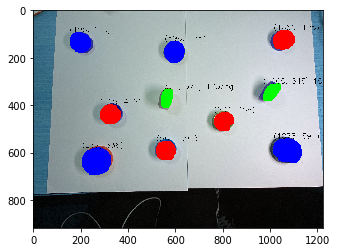

In [12]:
plt.imshow(dst)